In [1]:
!python --version

Python 3.9.2


In [2]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)

In [3]:
conn = sqlite3.connect("../../streamdb.db")

In [4]:
c = conn.cursor()

# Read Lapdata and determine sessionTime of each new Lap

In [5]:
session_name = 'russia_r'

In [6]:
sql = f"""SELECT * FROM {session_name}_lapdata"""
c.execute(sql)
data = c.fetchall()
data[:1]

[(1,
  0.11676184087991714,
  0.0,
  0.0,
  162.97134399414062,
  162.97134399414062,
  7,
  1)]

In [7]:
lapdata = pd.DataFrame(data, columns =['id', 'sessionTime', 'lastLapTime', 'currentLapTime', 'lapDistance', 'totalDistance', 'carPosition', 'currentLapNum'])
lapdata.head()

id  sessionTime  lastLapTime  currentLapTime  lapDistance  totalDistance  \
0   1     0.116762          0.0             0.0   162.971344     162.971344   
1   2     0.216888          0.0             0.0   162.971344     162.971344   
2   3     0.734020          0.0             0.0   162.971344     162.971344   
3   4     0.934178          0.0             0.0   162.971344     162.971344   
4   5     1.384664          0.0             0.0   162.971344     162.971344   

   carPosition  currentLapNum  
0            7              1  
1            7              1  
2            7              1  
3            7              1  
4            7              1

In [8]:
laptimes = lapdata['lastLapTime'].unique()
last_lap = lapdata[lapdata['currentLapNum'] == len(laptimes)]['currentLapTime'].max()
laptimes = np.append(laptimes, last_lap)
laptimes

array([0.00000000e+00, 9.97645798e+01, 9.55378647e+01, 9.60720673e+01,
       9.58431702e+01, 9.59078064e+01, 9.63461304e+01, 9.64044800e+01,
       9.60780029e+01, 9.70764160e+01, 1.00750977e+02, 1.17108032e+02,
       9.55727539e+01, 9.58769531e+01, 9.58410645e+01, 9.57749023e+01,
       9.57817383e+01, 9.68416748e+01, 9.62872314e+01, 9.60583496e+01,
       9.60922852e+01, 9.59240723e+01, 9.59464111e+01, 9.58657227e+01,
       1.06937012e+02, 1.34776367e+02, 9.62089844e+01, 9.66093750e+01,
       1.68012604e-02])

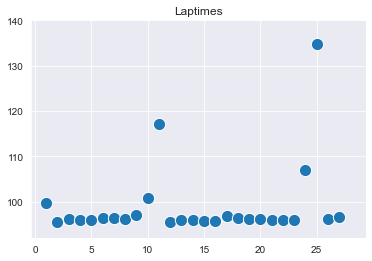

In [9]:
sns.scatterplot(x=range(1, len(laptimes)), y=laptimes[1:], s=150)
plt.ylim(92, 140)
plt.title("Laptimes");
plt.savefig("laptimes.png")

Best Laptime: 95.5378646850586
Median: 96.0780029296875
Mean: 99.01053421585648
Standard Deviation: 8.30901784280633
Slowest Laptime: 134.7763671875


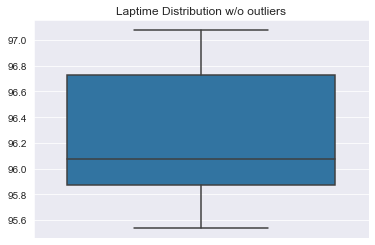

In [10]:
unique_laptimes = lapdata[lapdata['lastLapTime'] > 0]['lastLapTime'].unique()
print("Best Laptime:", np.min(unique_laptimes))
print("Median:", np.median(unique_laptimes))
print("Mean:", np.mean(unique_laptimes))
print("Standard Deviation:", np.std(unique_laptimes))
print("Slowest Laptime:", np.max(unique_laptimes))
sns.boxplot(y=unique_laptimes, showfliers = False)
plt.title("Laptime Distribution w/o outliers")
plt.draw()
plt.savefig("laptimes_boxplot.png")

In [11]:
for i, timing in enumerate(lapdata['lastLapTime'].unique()):
    print(i, timing)

0 0.0
1 99.76457977294922
2 95.5378646850586
3 96.07206726074219
4 95.84317016601562
5 95.90780639648438
6 96.34613037109375
7 96.40447998046875
8 96.0780029296875
9 97.076416015625
10 100.7509765625
11 117.1080322265625
12 95.57275390625
13 95.876953125
14 95.841064453125
15 95.77490234375
16 95.78173828125
17 96.8416748046875
18 96.2872314453125
19 96.058349609375
20 96.09228515625
21 95.924072265625
22 95.9464111328125
23 95.86572265625
24 106.93701171875
25 134.7763671875
26 96.208984375
27 96.609375


In [12]:
sns.scatterplot(x='lapDistance', y='currentLapTime', hue='currentLapNum', data=lapdata)
plt.title("Laptime and Lap Distance");
plt.savefig("laptimes_lapdistance.png")

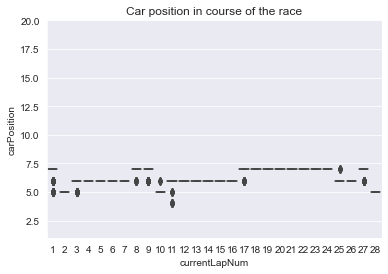

In [13]:
sns.boxplot(x='currentLapNum', y='carPosition', data=lapdata)
plt.ylim(1,20)
plt.title("Car position in course of the race");
plt.savefig("positions.png")

In [14]:
# Determine the sessiontime at every end of a lap
upper_boundaries = [0]
for lap in lapdata['currentLapNum'].unique():
    upper_boundary = lapdata[lapdata['currentLapNum'] == lap]['sessionTime'].max()
    upper_boundaries.append(upper_boundary)
upper_boundaries[:5]

[0,
 151.18309020996094,
 202.3319091796875,
 298.119873046875,
 393.97442626953125]

# Telemetry Data

In [15]:
sql = f"""SELECT * FROM {session_name}_telemetry"""
c.execute(sql)
data = c.fetchall()
data[:1]

[(1,
  0.28357741236686707,
  0,
  0.21611352264881134,
  -0.0039917719550430775,
  0.0,
  1,
  12998.0,
  0,
  29.0,
  29.0,
  29.0,
  29.0,
  55.0,
  57.0,
  60.0,
  60.0,
  55.0,
  66.0,
  74.0,
  74.0,
  83.0)]

In [16]:
column_names = [description[0] for description in c.description]
column_names[:5]

['id', 'sessionTime', 'speed', 'throttle', 'steer']

In [17]:
telemetry = pd.DataFrame(data, columns =column_names)
telemetry.head()

id  sessionTime  speed  throttle     steer  brake  gear  engineRPM  drs  \
0   1     0.283577      0  0.216114 -0.003992    0.0     1    12998.0    0   
1   2     1.551360      0  0.215625 -0.003992    0.0     1    13002.0    0   
2   3     2.385615      0  0.217578 -0.003992    0.0     1    13001.0    0   
3   4     2.752494      0  0.221241 -0.003992    0.0     1    13000.0    0   
4   5     3.369694      7  0.314031 -0.003992    0.0     1     9795.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                  29.0                  29.0                  29.0   
1                  29.0                  29.0                  29.0   
2                  29.0                  29.0                  29.0   
3                  29.0                  29.0                  29.0   
4                  29.0                  29.0                  29.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                  29.0                        55.0   
1                  29.0                        55.0   
2                  29.0                        55.0   
3                  29.0                        55.0   
4                  29.0                        63.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        57.0                        60.0   
1                        57.0                        60.0   
2                        57.0                        60.0   
3                        57.0                        60.0   
4                        65.0                        60.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        60.0                      55.0   
1                        60.0                      55.0   
2                        60.0                      55.0   
3                        60.0                      55.0   
4                        60.0                      55.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      66.0                      74.0   
1                      66.0                      73.0   
2                      66.0                      73.0   
3                      66.0                      73.0   
4                      66.0                      73.0   

   tyresInnerTemperature_FR  engineTemperature  
0                      74.0               83.0  
1                      73.0               84.0  
2                      73.0               84.0  
3                      73.0               84.0  
4                      73.0               85.0

In [18]:
intervals = []
for i in range(1, len(upper_boundaries)):
    tup = (upper_boundaries[i-1], upper_boundaries[i])
    intervals.append(tup)
intervals

[(0, 151.18309020996094),
 (151.18309020996094, 202.3319091796875),
 (202.3319091796875, 298.119873046875),
 (298.119873046875, 393.97442626953125),
 (393.97442626953125, 490.26300048828125),
 (490.26300048828125, 586.58447265625),
 (586.58447265625, 682.2386474609375),
 (682.2386474609375, 778.4769897460938),
 (778.4769897460938, 875.9998168945312),
 (875.9998168945312, 976.7062377929688),
 (976.7062377929688, 1093.5548095703125),
 (1093.5548095703125, 1189.244873046875),
 (1189.244873046875, 1284.406494140625),
 (1284.406494140625, 1380.5206298828125),
 (1380.5206298828125, 1476.98046875),
 (1476.98046875, 1572.2049560546875),
 (1572.2049560546875, 1669.132568359375),
 (1669.132568359375, 1765.4747314453125),
 (1765.4747314453125, 1860.6651611328125),
 (1860.6651611328125, 1957.1934814453125),
 (1957.1934814453125, 2053.498046875),
 (2053.498046875, 2149.51318359375),
 (2149.51318359375, 2244.470703125),
 (2244.470703125, 2350.85009765625),
 (2350.85009765625, 2485.93994140625),
 (24

In [19]:
bins = pd.IntervalIndex.from_tuples(intervals)
laps_intervals = pd.cut(telemetry['sessionTime'], bins)

In [20]:
telemetry['interval'] = laps_intervals
telemetry.head()

id  sessionTime  speed  throttle     steer  brake  gear  engineRPM  drs  \
0   1     0.283577      0  0.216114 -0.003992    0.0     1    12998.0    0   
1   2     1.551360      0  0.215625 -0.003992    0.0     1    13002.0    0   
2   3     2.385615      0  0.217578 -0.003992    0.0     1    13001.0    0   
3   4     2.752494      0  0.221241 -0.003992    0.0     1    13000.0    0   
4   5     3.369694      7  0.314031 -0.003992    0.0     1     9795.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                  29.0                  29.0                  29.0   
1                  29.0                  29.0                  29.0   
2                  29.0                  29.0                  29.0   
3                  29.0                  29.0                  29.0   
4                  29.0                  29.0                  29.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                  29.0                        55.0   
1                  29.0                        55.0   
2                  29.0                        55.0   
3                  29.0                        55.0   
4                  29.0                        63.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        57.0                        60.0   
1                        57.0                        60.0   
2                        57.0                        60.0   
3                        57.0                        60.0   
4                        65.0                        60.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        60.0                      55.0   
1                        60.0                      55.0   
2                        60.0                      55.0   
3                        60.0                      55.0   
4                        60.0                      55.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      66.0                      74.0   
1                      66.0                      73.0   
2                      66.0                      73.0   
3                      66.0                      73.0   
4                      66.0                      73.0   

   tyresInnerTemperature_FR  engineTemperature                   interval  
0                      74.0               83.0  (0.0, 151.18309020996094]  
1                      73.0               84.0  (0.0, 151.18309020996094]  
2                      73.0               84.0  (0.0, 151.18309020996094]  
3                      73.0               84.0  (0.0, 151.18309020996094]  
4                      73.0               85.0  (0.0, 151.18309020996094]

In [21]:
telemetry.isnull().sum()[telemetry.isnull().sum() > 0]

interval    3
dtype: int64

In [22]:
telemetry.dropna(subset=['interval'], axis=0, inplace=True)

In [23]:
lapnum = []
for i in range(0, len(telemetry)):
    value = telemetry.iloc[i].interval
    tup = eval(str(value).replace(']', ")"))
    lapn = intervals.index(tup) + 1
    lapnum.append(lapn)

lapnum[:5]

[1, 1, 1, 1, 1]

In [24]:
telemetry['lapNum'] = lapnum
telemetry.head()

id  sessionTime  speed  throttle     steer  brake  gear  engineRPM  drs  \
0   1     0.283577      0  0.216114 -0.003992    0.0     1    12998.0    0   
1   2     1.551360      0  0.215625 -0.003992    0.0     1    13002.0    0   
2   3     2.385615      0  0.217578 -0.003992    0.0     1    13001.0    0   
3   4     2.752494      0  0.221241 -0.003992    0.0     1    13000.0    0   
4   5     3.369694      7  0.314031 -0.003992    0.0     1     9795.0    0   

   brakesTemperature_RL  brakesTemperature_RR  brakesTemperature_FL  \
0                  29.0                  29.0                  29.0   
1                  29.0                  29.0                  29.0   
2                  29.0                  29.0                  29.0   
3                  29.0                  29.0                  29.0   
4                  29.0                  29.0                  29.0   

   brakesTemperature_FR  tyresSurfaceTemperature_RL  \
0                  29.0                        55.0   
1                  29.0                        55.0   
2                  29.0                        55.0   
3                  29.0                        55.0   
4                  29.0                        63.0   

   tyresSurfaceTemperature_RR  tyresSurfaceTemperature_FL  \
0                        57.0                        60.0   
1                        57.0                        60.0   
2                        57.0                        60.0   
3                        57.0                        60.0   
4                        65.0                        60.0   

   tyresSurfaceTemperature_FR  tyresInnerTemperature_RL  \
0                        60.0                      55.0   
1                        60.0                      55.0   
2                        60.0                      55.0   
3                        60.0                      55.0   
4                        60.0                      55.0   

   tyresInnerTemperature_RR  tyresInnerTemperature_FL  \
0                      66.0                      74.0   
1                      66.0                      73.0   
2                      66.0                      73.0   
3                      66.0                      73.0   
4                      66.0                      73.0   

   tyresInnerTemperature_FR  engineTemperature                   interval  \
0                      74.0               83.0  (0.0, 151.18309020996094]   
1                      73.0               84.0  (0.0, 151.18309020996094]   
2                      73.0               84.0  (0.0, 151.18309020996094]   
3                      73.0               84.0  (0.0, 151.18309020996094]   
4                      73.0               85.0  (0.0, 151.18309020996094]   

   lapNum  
0       1  
1       1  
2       1  
3       1  
4       1

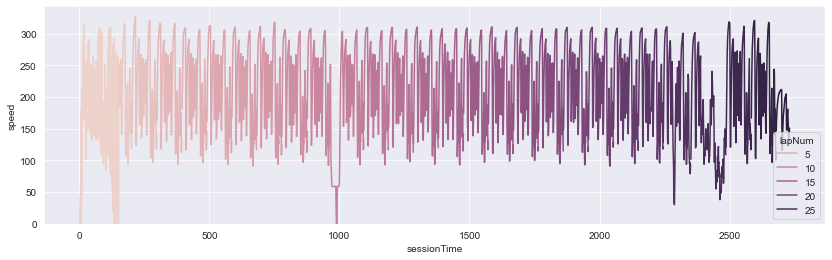

In [25]:
plt.figure(figsize=(14,4))
sns.lineplot(x=telemetry['sessionTime'], y=telemetry['speed'], hue=telemetry['lapNum'])
plt.ylim(0,);

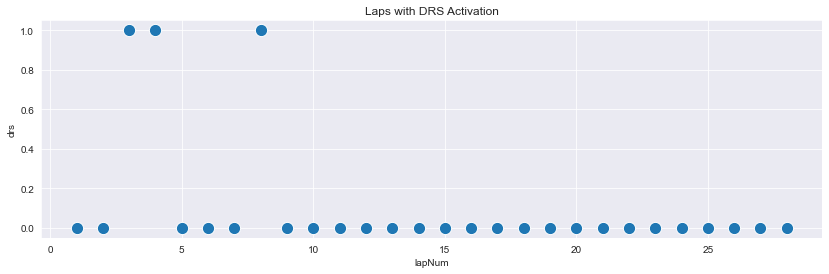

In [41]:
plt.figure(figsize=(14,4))
drs = telemetry.groupby(['lapNum'], as_index=False).max()[['lapNum', 'drs']]
sns.scatterplot(x='lapNum', y='drs', data=drs, s=150)
plt.title("Laps with DRS Activation");
plt.savefig("drs_activations.png")

In [26]:
for j, i in enumerate(intervals):
    print(f"Lap {j+1}: {i[0]}")

Lap 1: 0
Lap 2: 151.18309020996094
Lap 3: 202.3319091796875
Lap 4: 298.119873046875
Lap 5: 393.97442626953125
Lap 6: 490.26300048828125
Lap 7: 586.58447265625
Lap 8: 682.2386474609375
Lap 9: 778.4769897460938
Lap 10: 875.9998168945312
Lap 11: 976.7062377929688
Lap 12: 1093.5548095703125
Lap 13: 1189.244873046875
Lap 14: 1284.406494140625
Lap 15: 1380.5206298828125
Lap 16: 1476.98046875
Lap 17: 1572.2049560546875
Lap 18: 1669.132568359375
Lap 19: 1765.4747314453125
Lap 20: 1860.6651611328125
Lap 21: 1957.1934814453125
Lap 22: 2053.498046875
Lap 23: 2149.51318359375
Lap 24: 2244.470703125
Lap 25: 2350.85009765625
Lap 26: 2485.93994140625
Lap 27: 2583.078125
Lap 28: 2679.058837890625


# Compare two laps

In [27]:
lap1 = 9
lap2 = 20
excerpt1 = telemetry[telemetry['lapNum'] == lap1].copy()
excerpt2 = telemetry[telemetry['lapNum'] == lap2].copy()
excerpt1['normalizedTime'] = excerpt1['sessionTime'] - intervals[lap1-1][0]
excerpt2['normalizedTime'] = excerpt2['sessionTime'] - intervals[lap2-1][0]

In [28]:
compare_df = excerpt1.append(excerpt2)

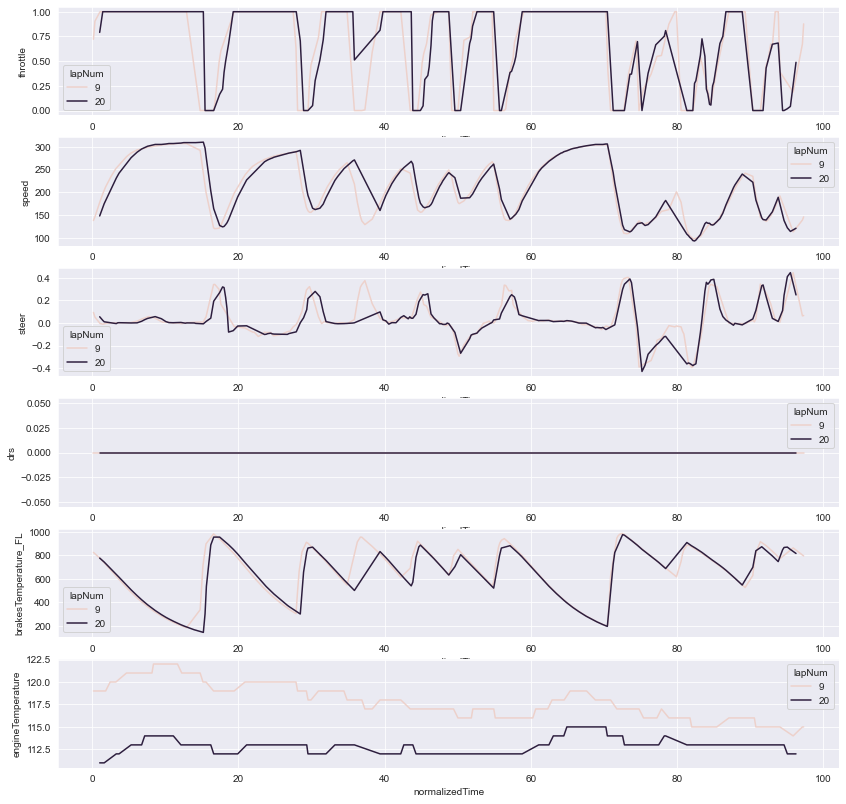

In [29]:
plt.figure(figsize=(14,14))
plt.subplot(6,1,1)
sns.lineplot(x='normalizedTime', y='throttle', hue='lapNum', data=compare_df)
plt.subplot(6,1,2)
sns.lineplot(x='normalizedTime', y='speed', hue='lapNum', data=compare_df)
plt.subplot(6,1,3)
sns.lineplot(x='normalizedTime', y='steer', hue='lapNum', data=compare_df)
plt.subplot(6,1,4)
sns.lineplot(x='normalizedTime', y='drs', hue='lapNum', data=compare_df)
plt.subplot(6,1,5)
sns.lineplot(x='normalizedTime', y='brakesTemperature_FL', hue='lapNum', data=compare_df)
plt.subplot(6,1,6)
sns.lineplot(x='normalizedTime', y='engineTemperature', hue='lapNum', data=compare_df);
plt.savefig("telemetry_analysis.png")

In [30]:
conn.close()